In [1]:
import pandas as pd
import numpy as np  
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  
import seaborn as sns
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import sqlite3
import sqlite3
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import os

In [2]:
import scipy

In [3]:
from scipy import stats

In [4]:
from scipy.stats import pearsonr

In [5]:
from scipy.stats import ttest_ind

In [6]:
from sklearn.metrics import classification_report

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

In [9]:
import requests

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# machine learning algorithm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import math
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [15]:
# evaluation on test data
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
pip install xlrd

# DATA CLEANING AND FEATURE ENGINEERING

In [17]:
creditt = pd.read_csv(r"C:\Users\shedu\Deskop\credit.csv")

In [18]:
fil = (creditt['EDUCATION'] == 5) | (creditt['EDUCATION'] == 6) | (creditt['EDUCATION'] == 0)
creditt.loc[fil, 'EDUCATION'] = 4

In [19]:
fil = creditt['MARRIAGE'] == 0
creditt.loc[fil, 'MARRIAGE'] = 3

In [20]:
creditt.drop(columns=['ID', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5'], inplace=True)

In [21]:
#creditt['MARRIAGE'].unique()
continuous_cols = ['AGE','PAY_0','PAY_2','PAY_4', 'PAY_5','PAY_6', 'PAY_3','BILL_AMT1','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

# OUTLIERS- IDENTIFICATION & REMOVAL

In [22]:
Q1 = creditt[continuous_cols].quantile(0.25)
Q3 = creditt[continuous_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((creditt[continuous_cols] < (Q1 - 1.5 * IQR)) | (creditt[continuous_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

In [23]:
# Remove outliers
creditt1 = creditt[~outliers].reset_index(drop=True)

In [24]:
from sklearn.datasets import make_classification

In [25]:
from sklearn.decomposition import PCA

# DATA STANDARDISATION USING STANDARD SCALER

In [26]:
X = creditt1.drop(columns=['DEFAULT_PAYMENT'])
y =creditt1['DEFAULT_PAYMENT']

In [27]:
X, y = make_classification(n_samples=48000, n_features=19, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.8, 0.2], flip_y=0, random_state=42)


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [29]:
# Apply PCA to reduce dimensionality
#pca = PCA(n_components=19) 
#X_pca = pca.fit_transform(X_scale)

In [30]:
#X_pca

# DATA BALANCING USING SMOTE

In [31]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scale,  y)
print('Original dataset shape', len(creditt))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29999
Resampled dataset shape 76800


In [32]:
X_smote

array([[ 0.39151275, -1.34703605,  0.19899299, ..., -0.63243517,
         0.40230271,  0.48661669],
       [ 1.00520557,  0.18398935, -0.92193943, ..., -1.14702265,
        -0.00850094,  1.07624624],
       [-3.13497813,  0.38689974, -0.70914213, ...,  2.47283232,
         2.43904132, -2.95544459],
       ...,
       [-2.03342   ,  0.21505002, -0.02738316, ...,  2.16017926,
         0.36696446, -2.11897731],
       [-1.484532  ,  0.266638  ,  2.68035286, ...,  1.69411793,
         0.01223955, -1.58950036],
       [-2.97775738, -0.45113411, -0.52977679, ...,  2.14950831,
         2.75209486, -2.73484534]])

In [33]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=19) 
X_pca = pca.fit_transform(X_smote)

In [34]:
X_pca

array([[ 2.52693099e+00,  2.45198232e+00, -7.45820701e-01, ...,
        -1.81799574e-15,  4.71180771e-15,  4.44968901e-15],
       [ 4.19659528e+00,  2.52427395e+00, -8.58316180e-01, ...,
        -1.22482686e-15,  5.59499969e-15,  3.53203375e-15],
       [-6.95357369e+00,  1.27160928e+00, -7.83086247e-01, ...,
        -2.82964737e-16,  4.78833919e-16,  7.44203911e-16],
       ...,
       [-3.71252045e+00, -1.88328094e+00, -4.36608421e-01, ...,
        -4.12395880e-17,  9.83074347e-16,  7.58250490e-16],
       [-2.23481983e+00, -1.78965433e+00,  4.82412601e-01, ...,
        -3.59291750e-16,  1.71616939e-15,  1.17963163e-15],
       [-6.61152700e+00,  2.31500253e+00,  8.21160120e-02, ...,
        -5.74986227e-16,  1.14517654e-15,  2.02435305e-15]])

In [35]:
columns = list(creditt1.columns)

In [36]:
columns.pop()

'DEFAULT_PAYMENT'

In [37]:
balancedr = pd.DataFrame(X_pca, columns=columns)

In [38]:
balancedr.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2.526931,2.451982,-0.745821,-1.476295,0.036505,0.274151,-0.708466,0.556085,-0.596447,9.302035e-18,-9.943727e-16,-4.792905e-15,3.136904e-15,8.541484e-15,-3.563105e-15,4.481257e-15,-1.817996e-15,4.711808e-15,4.449689e-15
1,4.196595,2.524274,-0.858316,-0.092401,0.917870,-0.895942,0.416460,-0.624337,-0.896856,-4.294666e-16,-7.752278e-16,-4.813560e-15,3.718113e-15,9.543245e-15,-4.129215e-15,4.616464e-15,-1.224827e-15,5.595000e-15,3.532034e-15
2,-6.953574,1.271609,-0.783086,0.832587,-0.271251,-0.497032,0.145335,0.577053,0.152603,-8.748458e-16,2.110638e-16,-1.148110e-15,1.792027e-16,1.344831e-15,-4.383454e-16,7.664472e-16,-2.829647e-16,4.788339e-16,7.442039e-16
3,2.926088,4.841972,-3.064880,0.148204,-0.099360,-0.429685,0.033429,1.618873,1.222175,-2.508461e-16,-9.520586e-16,-5.778341e-15,4.123416e-15,9.974000e-15,-3.909666e-15,4.819648e-15,-1.726052e-15,6.155260e-15,3.822424e-15
4,2.640958,2.486671,0.570352,0.421211,0.568214,-0.407729,1.332586,-0.013864,1.460392,-6.580136e-16,-1.160886e-17,-4.862821e-15,3.721158e-15,8.424348e-15,-3.423721e-15,4.176879e-15,-5.176437e-16,5.402497e-15,1.948437e-15


In [39]:
balancedr['DEFAULT_PAYMENT'] = y_smote

<Axes: xlabel='DEFAULT_PAYMENT', ylabel='count'>

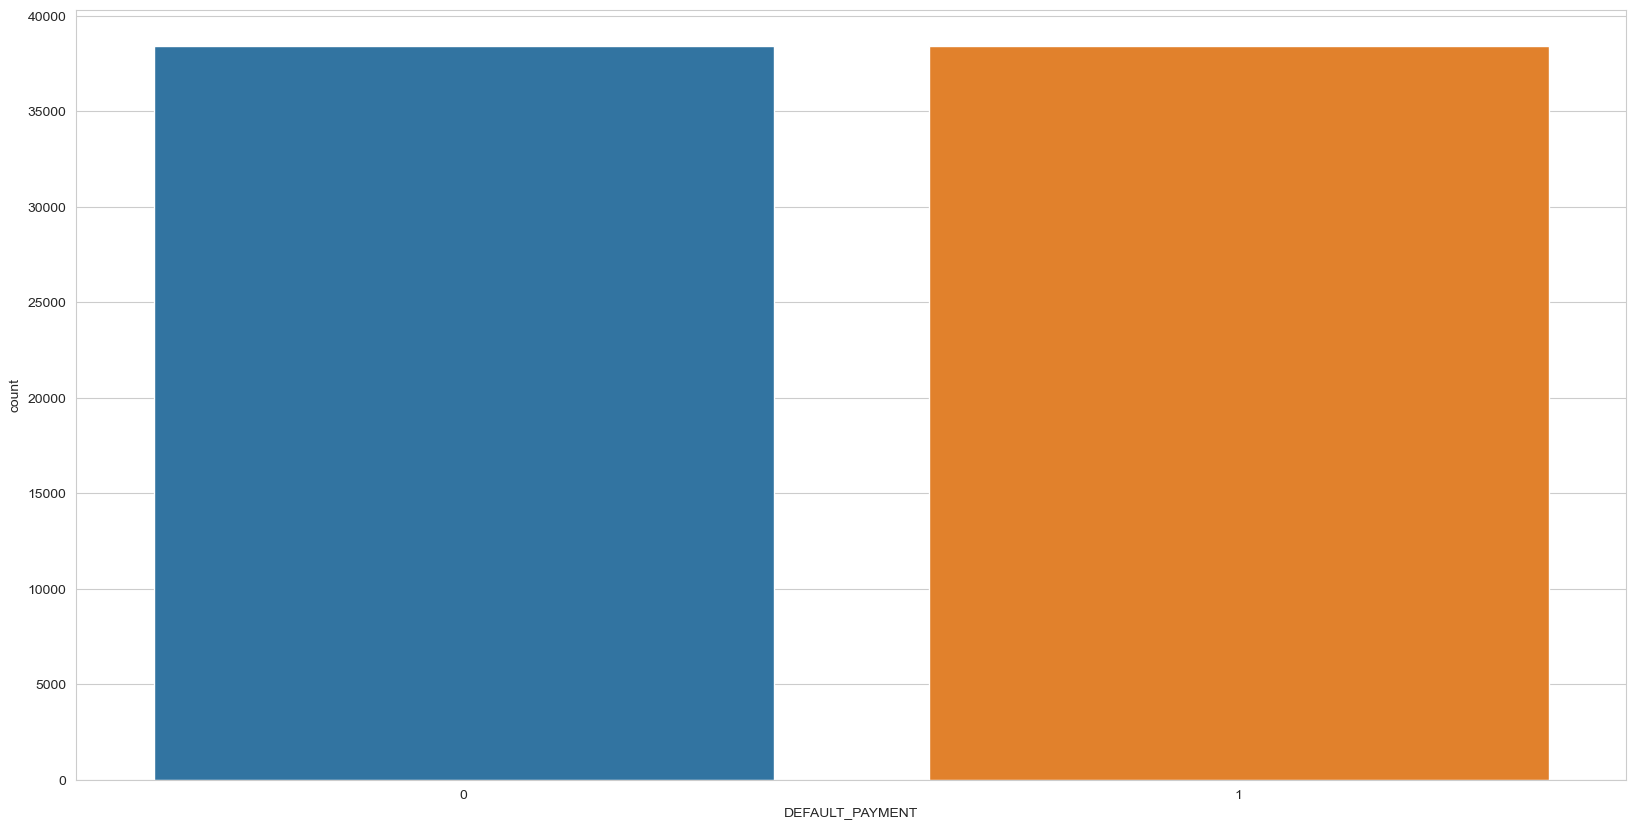

In [40]:
sns.countplot (x = 'DEFAULT_PAYMENT', data = balancedr)

In [41]:
X_smote.shape

(76800, 19)

In [42]:
y_smote.shape

(76800,)

In [43]:
from sklearn.datasets import make_classification

In [44]:
from sklearn.decomposition import PCA

# TRAIN-TEST SPLIT

In [45]:
X, y = make_classification(n_samples=48000, n_features=19, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.8, 0.2], flip_y=0, random_state=42)

In [46]:
X = balancedr.drop(columns=['DEFAULT_PAYMENT'])
y = balancedr['DEFAULT_PAYMENT']

In [47]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
feature_names=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_PAYMENT']

In [49]:
balancedr.to_csv('clean_creditt.csv')

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

# LOGISTIC REGRESSION

In [51]:
#fitting data into Logistic Regression
#logi = LogisticRegression(fit_intercept=True, max_iter=10000)
#logi.fit(X_train, y_train)
logreg = LogisticRegression(solver='liblinear')


In [52]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}


In [53]:
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [55]:
from sklearn.linear_model import LogisticRegression

In [57]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 1, 'penalty': 'l1'}


In [58]:
best_logreg = grid_search.best_estimator_

In [59]:
best_logreg.fit(X_train, y_train)


LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [60]:
y_pred = best_logreg.predict(X_test)


In [61]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9822916666666667
Confusion Matrix:
 [[7511  141]
 [ 131 7577]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      7652
           1       0.98      0.98      0.98      7708

    accuracy                           0.98     15360
   macro avg       0.98      0.98      0.98     15360
weighted avg       0.98      0.98      0.98     15360



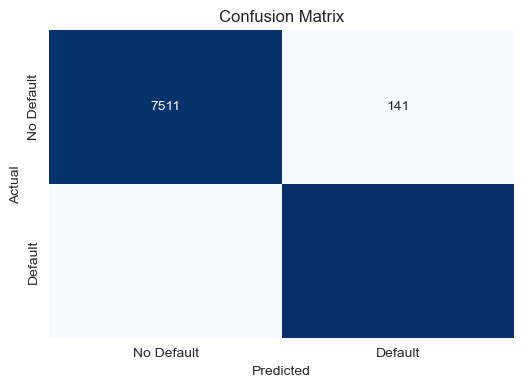

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


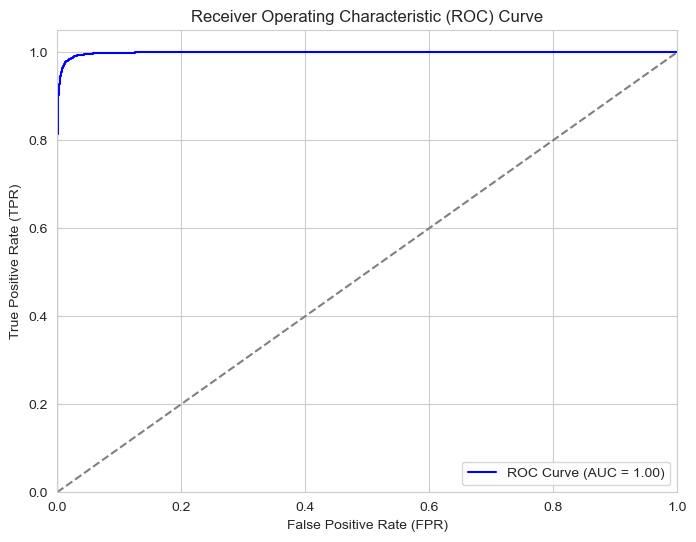

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score


# `best_logreg.predict_proba()` returns probabilities for both classes, we need class 1 (default)
y_pred_proba = best_logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()





# XGBOOST

In [67]:
import xgboost as xgb


In [68]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters from GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model from GridSearchCV
best_xgb = grid_search.best_estimator_

# Train the best model on the training data
best_xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb.predict(X_test)

# Evaluate the model - Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.9940104166666667


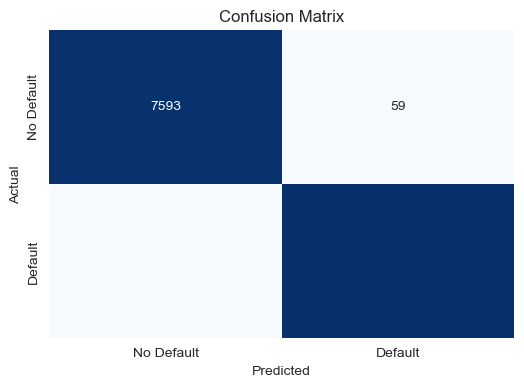

In [69]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [70]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      7652
           1       0.99      1.00      0.99      7708

    accuracy                           0.99     15360
   macro avg       0.99      0.99      0.99     15360
weighted avg       0.99      0.99      0.99     15360



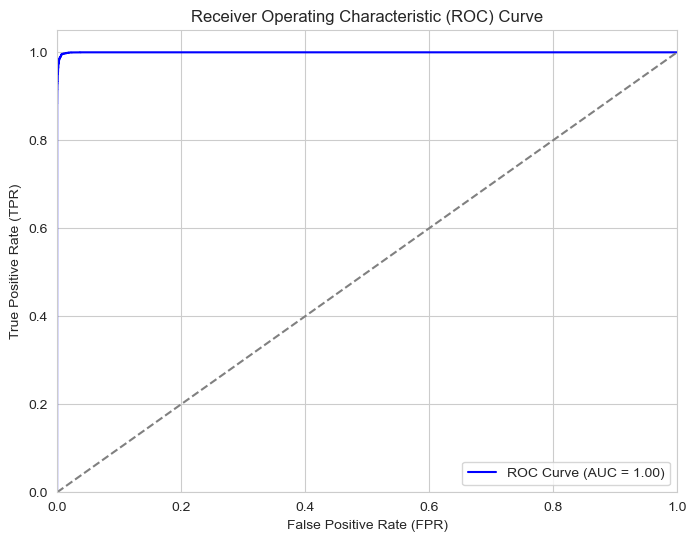

In [71]:
# ROC Curve and AUC
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# SVM +LASSO

In [74]:
from sklearn.svm import LinearSVC


In [75]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [76]:
svm_model = LinearSVC(penalty='l1', dual=False, max_iter=10000)


In [77]:

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}



In [78]:
# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=LinearSVC(dual=False, max_iter=10000, penalty='l1'),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             scoring='accuracy', verbose=1)

In [79]:
# Best hyperparameters from GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 0.01}


In [80]:

# Use the best model from GridSearchCV
best_svm = grid_search.best_estimator_



In [82]:
from sklearn.calibration import CalibratedClassifierCV


In [83]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [84]:
# Since LinearSVC does not have the `predict_proba` method, we need to use CalibratedClassifierCV
calibrated_svm = CalibratedClassifierCV(best_svm, method='sigmoid')
calibrated_svm.fit(X_train, y_train)

CalibratedClassifierCV(estimator=LinearSVC(C=0.01, dual=False, max_iter=10000,
                                           penalty='l1'))

Accuracy: 0.9820963541666666


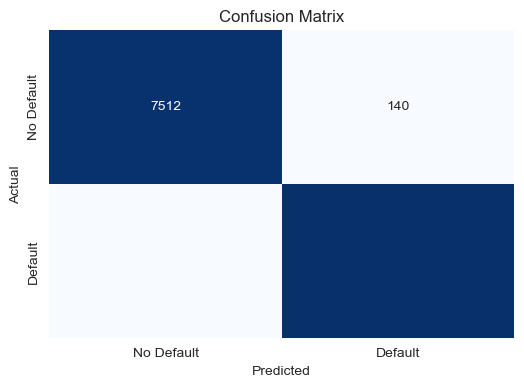

In [85]:
y_pred = calibrated_svm.predict(X_test)

# Evaluate the model - Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      7652
           1       0.98      0.98      0.98      7708

    accuracy                           0.98     15360
   macro avg       0.98      0.98      0.98     15360
weighted avg       0.98      0.98      0.98     15360



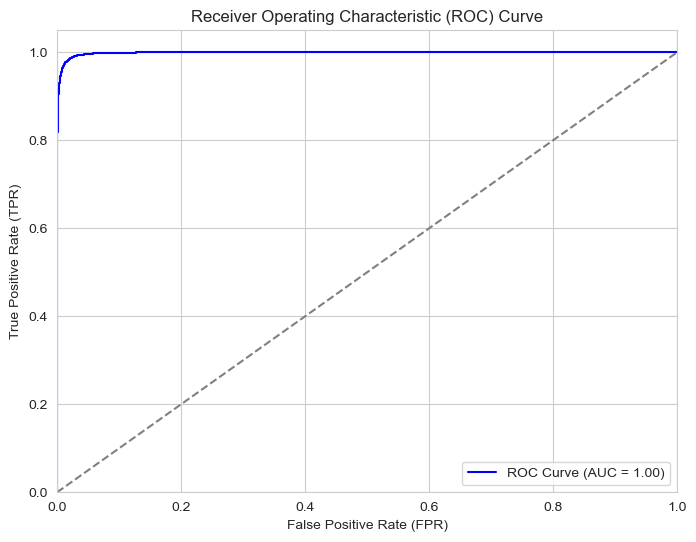

In [86]:

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve and AUC
y_pred_proba = calibrated_svm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Random Forest

In [87]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf_model = RandomForestClassifier()


In [89]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [90]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [91]:
best_rf = grid_search.best_estimator_


In [97]:
best_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, max_depth=30)

In [98]:
y_pred = best_rf.predict(X_test)


In [99]:
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.9936197916666667


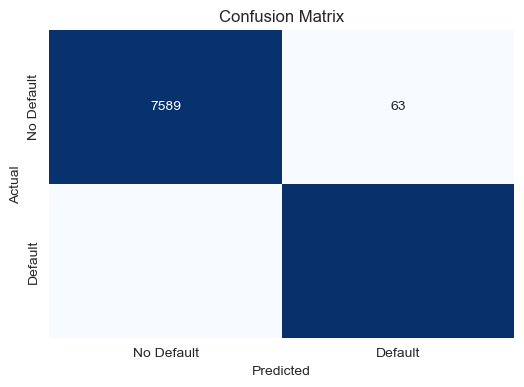

In [101]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [102]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      7652
           1       0.99      1.00      0.99      7708

    accuracy                           0.99     15360
   macro avg       0.99      0.99      0.99     15360
weighted avg       0.99      0.99      0.99     15360



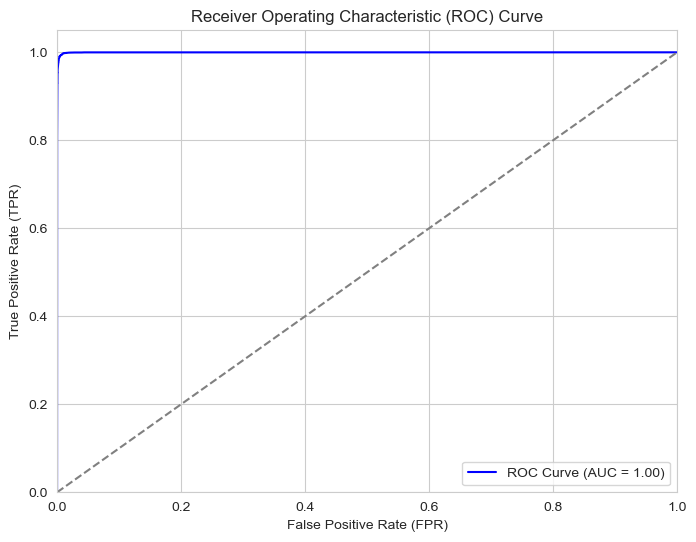

In [103]:
#ROC Curve and AUC
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# LR, RF, XGBOOST

In [105]:
from xgboost import XGBClassifier

In [106]:
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


In [107]:
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [108]:
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
lr_grid_search.fit(X_train, y_train)
print("Best LR Hyperparameters:", lr_grid_search.best_params_)
best_lr = lr_grid_search.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best LR Hyperparameters: {'C': 0.1, 'penalty': 'l2'}


In [109]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [110]:
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print("Best RF Hyperparameters:", rf_grid_search.best_params_)
best_rf = rf_grid_search.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best RF Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [111]:
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [112]:
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)
print("Best XGBoost Hyperparameters:", xgb_grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best XGBoost Hyperparameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [113]:
best_xgb = xgb_grid_search.best_estimator_



In [115]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier 

In [116]:
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    voting='soft'
)

In [117]:
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    voting='soft'
)

In [118]:
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=0.1)),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=30,
                                                     n_estimators=200)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='loglo...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [119]:
y_pred = ensemble_model.predict(X_test)
y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]



In [120]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9936848958333333


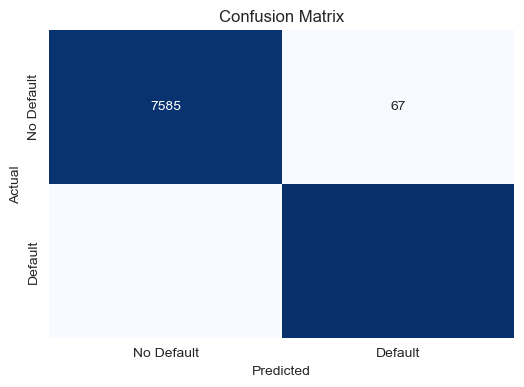

In [121]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [122]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      7652
           1       0.99      1.00      0.99      7708

    accuracy                           0.99     15360
   macro avg       0.99      0.99      0.99     15360
weighted avg       0.99      0.99      0.99     15360



In [123]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [125]:
cm

array([[7585,   67],
       [  30, 7678]], dtype=int64)

# Feature Importance

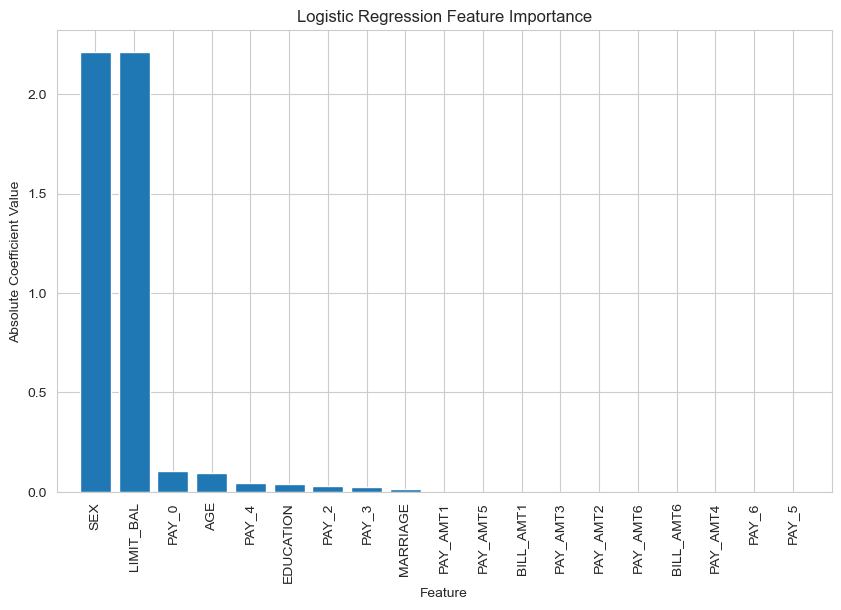

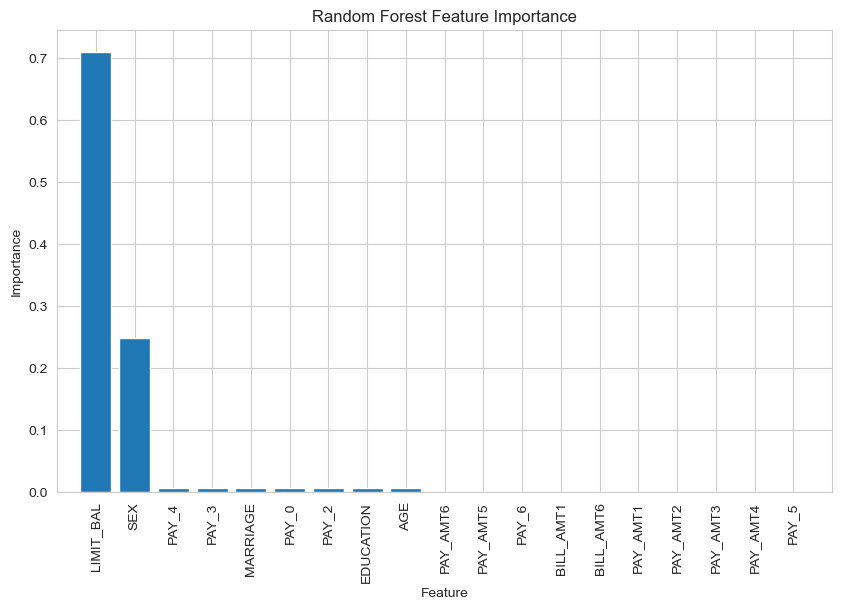

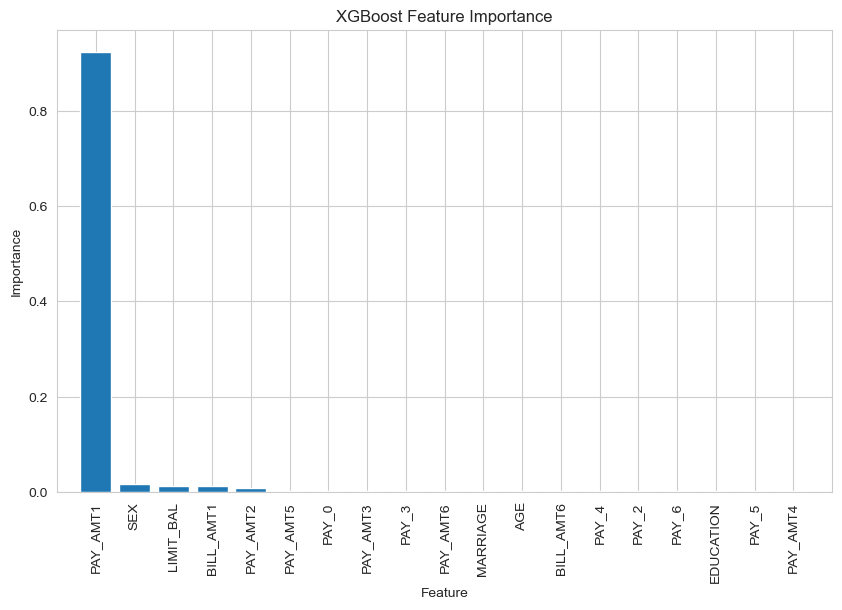

In [128]:
# Feature Importance for Logistic Regression
def plot_feature_importance(model, X, title):
    coef = model.coef_[0]
    importance = np.abs(coef)
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(X.shape[1]), importance[indices], align='center')
    plt.xticks(range(X.shape[1]), np.array(creditt.columns[:-1])[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.xlabel('Feature')
    plt.ylabel('Absolute Coefficient Value')
    plt.show()

# Feature Importance for Random Forest
def plot_rf_feature_importance(model, X, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), np.array(creditt.columns[:-1])[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

# Feature Importance for XGBoost
def plot_xgb_feature_importance(model, X, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), np.array(creditt.columns[:-1])[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

# Plot feature importance
plot_feature_importance(best_lr, X_train, 'Logistic Regression Feature Importance')
plot_rf_feature_importance(best_rf, X_train, 'Random Forest Feature Importance')
plot_xgb_feature_importance(best_xgb, X_train, 'XGBoost Feature Importance')